In [176]:
# import required libraries
# pandas:Data framework library for Python
# sklearn: Library to perform machine learning tasks
import pandas as pd
import numpy as np
import scipy
import sklearn 
import sklearn.datasets
import sklearn.metrics as metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import mutual_info_classif
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
from numpy import nan
import re
from scipy import stats

In [2]:
Data_2017 = pd.read_excel("PERM_Disclosure_Data_FY17.xlsx")
Data_2015 = pd.read_excel("PERM_Disclosure_Data_FY15_Q4.xlsx")
Data_2016 = pd.read_excel("PERM_Disclosure_Data_FY16.xlsx")

In [3]:
Data_2015.at[8809, 'RI_LOCAL_ETHNIC_PAPER_FROM'] = datetime.strptime('10/22/2014', '%m/%d/%Y')
Data_2015.at[29257, 'RI_LOCAL_ETHNIC_PAPER_FROM'] = datetime.strptime('10/06/2014', '%m/%d/%Y')
Data_2015.at[86322, 'RI_LOCAL_ETHNIC_PAPER_FROM'] = datetime.strptime('03/09/2015', '%m/%d/%Y')
Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'] = pd.to_datetime(Data_2015['RI_LOCAL_ETHNIC_PAPER_FROM'])
Data_2015['RECR_INFO_SWA_JOB_ORDER_START'] = pd.to_datetime(Data_2015['RECR_INFO_SWA_JOB_ORDER_START'])
Data_2015.at[6306, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/26/2014', '%m/%d/%Y')
Data_2015.at[8602, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('11/08/2014', '%m/%d/%Y')
Data_2015.at[12210, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/25/2014', '%m/%d/%Y')
Data_2015.at[35208, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('08/30/2013', '%m/%d/%Y')
Data_2015.at[41211, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/25/2014', '%m/%d/%Y')
Data_2015.at[79773, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/19/2014', '%m/%d/%Y')
Data_2015.at[80176, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('06/14/2015', '%m/%d/%Y')
Data_2015.at[80177, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('06/14/2015', '%m/%d/%Y')
Data_2015.at[83651, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/26/2013', '%m/%d/%Y')
Data_2015['RECR_INFO_SWA_JOB_ORDER_END'] = pd.to_datetime(Data_2015['RECR_INFO_SWA_JOB_ORDER_END'])
Data_2015.at[76114, 'RI_EMPLOYER_WEB_POST_FROM'] = datetime.strptime('04/22/2014', '%m/%d/%Y')
Data_2015.at[89154, 'RI_EMPLOYER_WEB_POST_FROM'] = datetime.strptime('05/01/2015', '%m/%d/%Y')
Data_2015['RI_EMPLOYER_WEB_POST_FROM'] = pd.to_datetime(Data_2015['RI_EMPLOYER_WEB_POST_FROM'])
Data_2015.at[29489, 'RECR_INFO_PRO_ORG_ADVERT_FROM'] = datetime.strptime('01/01/2013', '%m/%d/%Y')
Data_2015['RECR_INFO_PRO_ORG_ADVERT_FROM'] = pd.to_datetime(Data_2015['RECR_INFO_PRO_ORG_ADVERT_FROM'])
Data_2015.at[26192, 'RI_JOB_SEARCH_WEBSITE_FROM'] = datetime.strptime('01/13/2014', '%m/%d/%Y')
Data_2015.at[70342, 'RI_JOB_SEARCH_WEBSITE_FROM'] = datetime.strptime('05/02/2014', '%m/%d/%Y')
Data_2015.at[83733, 'RI_JOB_SEARCH_WEBSITE_FROM'] = datetime.strptime('11/15/2011', '%m/%d/%Y')
Data_2015['RI_JOB_SEARCH_WEBSITE_FROM'] = pd.to_datetime(Data_2015['RI_JOB_SEARCH_WEBSITE_FROM'])
Data_2015.at[24138, 'RI_EMPLOYEE_REFERRAL_PROG_FROM'] = datetime.strptime('12/23/2014', '%m/%d/%Y')
Data_2015.at[38262, 'RI_EMPLOYEE_REFERRAL_PROG_FROM'] = datetime.strptime('06/04/2014', '%m/%d/%Y')
Data_2015.at[47808, 'RI_EMPLOYEE_REFERRAL_PROG_FROM'] = datetime.strptime('06/25/2014', '%m/%d/%Y')
Data_2015['RI_EMPLOYEE_REFERRAL_PROG_FROM'] = pd.to_datetime(Data_2015['RI_EMPLOYEE_REFERRAL_PROG_FROM'])
Data_2015.at[14771, 'RI_CAMPUS_PLACEMENT_FROM'] = datetime.strptime('04/01/2013', '%m/%d/%Y')
Data_2015.at[49525, 'RI_CAMPUS_PLACEMENT_FROM'] = datetime.strptime('05/02/2013', '%m/%d/%Y')
Data_2015.at[73061, 'RI_CAMPUS_PLACEMENT_FROM'] = datetime.strptime('09/23/2014', '%m/%d/%Y')
Data_2015['RI_CAMPUS_PLACEMENT_FROM'] = pd.to_datetime(Data_2015['RI_CAMPUS_PLACEMENT_FROM'])
Data_2017.at[31198, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
Data_2017.at[77798, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('04/26/2017', '%m/%d/%Y')
Data_2017.at[92988, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('03/30/2017', '%m/%d/%Y')

Data_2017['RECR_INFO_SWA_JOB_ORDER_START'] = pd.to_datetime(Data_2017['RECR_INFO_SWA_JOB_ORDER_START'])
#Data_2017.at[31198, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
#Data_2017.at[77798, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('04/26/2017', '%m/%d/%Y')
Data_2017.at[704, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/17/2016', '%m/%d/%Y')
Data_2017.at[2932, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('04/13/2016', '%m/%d/%Y')
Data_2017.at[18749, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('05/13/2016', '%m/%d/%Y')
Data_2017.at[73589, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/05/2017', '%m/%d/%Y')
Data_2017.at[82743, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/06/2017', '%m/%d/%Y')
Data_2017.at[92390, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/27/2017', '%m/%d/%Y')
Data_2017.at[93721, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/27/2017', '%m/%d/%Y')
Data_2017.at[96292, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/05/2017', '%m/%d/%Y')
Data_2017['RECR_INFO_SWA_JOB_ORDER_END'] = pd.to_datetime(Data_2017['RECR_INFO_SWA_JOB_ORDER_END'])
Data_2016.at[96389, 'RECR_INFO_SWA_JOB_ORDER_START'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
Data_2016['RECR_INFO_SWA_JOB_ORDER_START'] = pd.to_datetime(Data_2016['RECR_INFO_SWA_JOB_ORDER_START'])
Data_2016.at[29552, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('06/04/2015', '%m/%d/%Y')
Data_2016.at[33362, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/06/2015', '%m/%d/%Y')
Data_2016.at[49878, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/02/2015', '%m/%d/%Y')
Data_2016.at[60593, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('08/03/2015', '%m/%d/%Y')
Data_2016.at[91218, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('11/30/2015', '%m/%d/%Y')
Data_2016.at[113096, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/15/2016', '%m/%d/%Y')
Data_2016.at[114287, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
Data_2016.at[120997, 'RECR_INFO_SWA_JOB_ORDER_END'] = datetime.strptime('03/30/2016', '%m/%d/%Y')
Data_2016['RECR_INFO_SWA_JOB_ORDER_END'] = pd.to_datetime(Data_2016['RECR_INFO_SWA_JOB_ORDER_END'])

In [186]:
frames = [Data_2015, Data_2016, Data_2017]

data = pd.concat(frames)
data = data.drop_duplicates()
data_raw = data.copy()

In [187]:
#For wages that have a to and from, Im just gonna take the average
data_wage = data[['WAGE_OFFER_UNIT_OF_PAY_9089','WAGE_OFFER_FROM_9089','WAGE_OFFER_TO_9089','CASE_STATUS']]
#cleaning up the wages of the offer
#pd.to_numeric(data_wage['WAGE_OFFER_FROM_9089'])
data['WAGE_OFFER_FROM_9089'] = data['WAGE_OFFER_FROM_9089'].apply(lambda word: str(word).replace("#", ""))
data['WAGE_OFFER_FROM_9089'] = data['WAGE_OFFER_FROM_9089'].apply(lambda word: str(word).replace(",", ""))
data['WAGE_OFFER_FROM_9089'] = data['WAGE_OFFER_FROM_9089'].replace({"nan": np.NaN})
data['WAGE_OFFER_FROM_9089'] = pd.to_numeric(data['WAGE_OFFER_FROM_9089'])
data['WAGE_OFFER_TO_9089'] = data['WAGE_OFFER_TO_9089'].apply(lambda word: str(word).replace("#", ""))
data['WAGE_OFFER_TO_9089'] = data['WAGE_OFFER_TO_9089'].apply(lambda word: str(word).replace(",", ""))
data['WAGE_OFFER_TO_9089'] = data['WAGE_OFFER_TO_9089'].replace({"nan": np.NaN})
data['WAGE_OFFER_TO_9089'] = pd.to_numeric(data['WAGE_OFFER_TO_9089'])

In [188]:
#Getting average wage for to - from
data['Avg_Wage'] = np.where(pd.isnull(data['WAGE_OFFER_TO_9089']) == True,data['WAGE_OFFER_FROM_9089'], ((data['WAGE_OFFER_TO_9089']+ data['WAGE_OFFER_FROM_9089']) / 2)) 
data.WAGE_OFFER_UNIT_OF_PAY_9089.fillna('None', inplace=True)
data['WAGE_OFFER_UNIT_OF_PAY_9089'] = data['WAGE_OFFER_UNIT_OF_PAY_9089'].astype('str')

In [189]:
#Transforming units to yearly equivalents
data['unit'] = data['WAGE_OFFER_UNIT_OF_PAY_9089']
data['unit'] = data['unit'].replace({"Hour": 2080, "Week":52,"Month":12,"Bi-Weekly":26,"Year":1,"None":np.NaN})
data['unit'] = pd.to_numeric(data['unit'])
#calculating yearly wage
data['Year_wage_offer'] = data['Avg_Wage'] * data['unit']

In [190]:
#Changing over prevailing wage amounts
data['PW_AMOUNT_9089'] = data['PW_AMOUNT_9089'].apply(lambda word: str(word).replace("#", ""))
data['PW_AMOUNT_9089'] = data['PW_AMOUNT_9089'].apply(lambda word: str(word).replace(",", ""))
data['PW_AMOUNT_9089'] = data['PW_AMOUNT_9089'].replace({"nan": np.NaN})
data['PW_AMOUNT_9089'] = pd.to_numeric(data['PW_AMOUNT_9089'])
data['unit_pw'] = data['PW_UNIT_OF_PAY_9089']
data['unit_pw'] = data['unit_pw'].replace({"Hour": 2080, "Week":52,"Month":12,"Bi-Weekly":26,"Year":1,"None":np.NaN})
data['unit_pw'] = pd.to_numeric(data['unit_pw'])
data['Year_wage_pw'] = data['PW_AMOUNT_9089'] * data['unit_pw']

In [191]:
#Filling up the nulls with the medians from the industry / level for both prevailing wage and offer
data['Ind_code'] = data['PW_SOC_CODE'].apply(lambda num: str(num)[:2])
data['Wage_level'] =  data['PW_LEVEL_9089'].replace({"Level I": 1, "Level II": 2, "Level III":3,"Level IV":4}) 
data['Wage_level'] = data['Wage_level'].fillna("None")
norm_wage = pd.DataFrame(data.groupby(['Ind_code','Wage_level'])['Year_wage_pw'].median())
norm_wage.columns= ["Median_pw"]
data['Year_wage_pw'] = data['Year_wage_pw'].fillna(data.merge(norm_wage, how = "left", left_on = ['Ind_code','Wage_level'], right_index = True)['Median_pw'])
norm_wage_off = pd.DataFrame(data.groupby(['Ind_code','Wage_level'])['Year_wage_offer'].median())
norm_wage_off.columns= ["Median_offer"]
data['Year_wage_offer'] = data['Year_wage_offer'].fillna(data.merge(norm_wage_off, how = "left", left_on = ['Ind_code','Wage_level'], right_index = True)['Median_offer'])

In [192]:
#visa information transformation
#making the VISA column into booleans, if have H1B, if have other, if have none
data['CLASS_OF_ADMISSION'] = np.where(data['CLASS_OF_ADMISSION'].isnull(), "None", data['CLASS_OF_ADMISSION'])
data['H1B_VISA'] = np.where(data['CLASS_OF_ADMISSION'] == "H-1B", 1, 0)
tmp = np.isin(data['CLASS_OF_ADMISSION'], ['H-1B','None','Not in USA','Parolee'])
data['Other_Visa'] = np.where(tmp , 0, 1)
tmp = np.isin(data['CLASS_OF_ADMISSION'], ['None','Not in USA','Parolee'])
data['No_US_Visa'] = np.where(tmp , 1, 0)
#visa_info['No_US_Visa'] = np.where(visa_info['CLASS_OF_ADMISSION']  in ['H-1B','NaN','Not in USA','Parolee'] , 1, 0)

In [193]:
#education level transformation
data['Same_education'] = np.where(data['JOB_INFO_EDUCATION'] == data ['FOREIGN_WORKER_INFO_EDUCATION'], 1 , 0 )
mapping = {"Master's" : 4, "Bachelor's": 3, "None":0, "Doctorate":5 , "Other": np.NaN, "High School":1, "Associate's":2, "NaN":np.NaN}

data = data.replace({'FOREIGN_WORKER_INFO_EDUCATION': mapping, 'JOB_INFO_EDUCATION': mapping})
data['Higher education'] = np.where(data['FOREIGN_WORKER_INFO_EDUCATION'] > data['JOB_INFO_EDUCATION'], 1,0)
data['Lower education'] = np.where(data['FOREIGN_WORKER_INFO_EDUCATION'] < data['JOB_INFO_EDUCATION'], 1,0)

In [194]:
#recruitment dates transformation
data['swa'] = (data['RECR_INFO_SWA_JOB_ORDER_END'] - data['RECR_INFO_SWA_JOB_ORDER_START']).dt.days
data['job_fair'] = (data['RECR_INFO_JOB_FAIR_TO'] - data['RECR_INFO_JOB_FAIR_FROM']).dt.days
data['campus_fair'] = (data['RECR_INFO_ON_CAMPUS_RECR_TO'] - data['RECR_INFO_ON_CAMPUS_RECR_FROM']).dt.days
data['web_post'] = (data['RI_EMPLOYER_WEB_POST_TO'] - data['RI_EMPLOYER_WEB_POST_FROM']).dt.days
data['org_ad'] = (data['RECR_INFO_PRO_ORG_ADVERT_TO'] - data['RECR_INFO_PRO_ORG_ADVERT_FROM']).dt.days
data['searc_web'] =  (data['RI_JOB_SEARCH_WEBSITE_TO'] - data['RI_JOB_SEARCH_WEBSITE_FROM']).dt.days
data['emp_frm'] =  (data['RI_PVT_EMPLOYMENT_FIRM_TO'] - data['RI_PVT_EMPLOYMENT_FIRM_FROM']).dt.days
data['ref_prof'] = (data['RI_EMPLOYEE_REFERRAL_PROG_TO'] - data['RI_EMPLOYEE_REFERRAL_PROG_FROM']).dt.days
data['campus_pl'] = (data['RI_CAMPUS_PLACEMENT_TO'] - data['RI_CAMPUS_PLACEMENT_FROM']).dt.days
data['eth_pp'] = (data['RI_LOCAL_ETHNIC_PAPER_TO'] - data['RI_LOCAL_ETHNIC_PAPER_FROM']).dt.days
data['tv_ad'] = (data['RECR_INFO_RADIO_TV_AD_TO'] - data['RECR_INFO_RADIO_TV_AD_FROM']).dt.days
data['RECR_INFO_FIRST_AD_START'] = np.where(np.isnat(data['RECR_INFO_FIRST_AD_START']),0,1)
data['RECR_INFO_SECOND_AD_START'] = np.where(np.isnat(data['RECR_INFO_SECOND_AD_START']),0,1)
data[['job_fair','campus_fair','web_post','org_ad','searc_web','emp_frm','ref_prof','campus_pl','eth_pp','tv_ad']] = data[['job_fair','campus_fair','web_post','org_ad','searc_web','emp_frm','ref_prof','campus_pl','eth_pp','tv_ad']].replace({0.0:1.0})
data['Total_rec'] = data[['swa','RECR_INFO_SECOND_AD_START','RECR_INFO_FIRST_AD_START','job_fair','campus_fair','web_post','org_ad','searc_web','emp_frm','ref_prof','campus_pl','eth_pp','tv_ad']].sum(axis=1)

In [195]:
#transforming the leftover columns
data['JOB_INFO_JOB_REQ_NORMAL'] = np.where((data['JOB_INFO_JOB_REQ_NORMAL']) == "Y", 1,0)
data['DEC_YEAR'] = pd.DatetimeIndex(data['DECISION_DATE']).year
data['LAWYER'] = np.where(pd.isnull(data['AGENT_FIRM_NAME']), 0, 1)
data['CASE_STATUS'] = pd.DataFrame(np.where(data['CASE_STATUS'] == 'Certified-Expired' , 'Certified', data['CASE_STATUS']))
data['JOB_INFO_FOREIGN_LANG_REQ'] = np.where(data['JOB_INFO_FOREIGN_LANG_REQ'] == "Y", 1,0)
data['JOB_INFO_COMBO_OCCUPATION'] = np.where((data['JOB_INFO_COMBO_OCCUPATION']) == "Y", 1,0)

In [196]:
#Job ZIPCODES BY REGION
data['JOB_INFO_WORK_POSTAL_CODE'] = data['JOB_INFO_WORK_POSTAL_CODE'].replace('-','')
data['JOB_INFO_WORK_POSTAL_CODE'] = data['JOB_INFO_WORK_POSTAL_CODE'].astype(int,errors='ignore')

values = []

for x in data['JOB_INFO_WORK_POSTAL_CODE']:
    y=str(x)
    if re.search('[áa-zA-Z]',y):
        values.append(-1)
    else:
        values.append(y[:1])

In [197]:
loc = data.columns.get_loc('JOB_INFO_WORK_POSTAL_CODE')
data.insert(loc + 1, 'postalValue',value = values)

In [198]:
#Employee Citizenship Country
Countries = pd.read_excel("Countries.xlsx")
CountriesDf = Countries.copy()
dfList = data['COUNTRY_OF_CITIZENSHIP'].tolist()
CountriesList = CountriesDf['Country'].tolist()
RegionsList = CountriesDf['Region'].tolist()

In [199]:
count = 0
regionList = []
for i in dfList:
    count += 1
    if(count%10000 == 0):
        print(count)
    country = i
    country = str(country)
    countryList = country.split(" AND ")
    found = False
    for j, k in zip(CountriesList, RegionsList):
        if(country == j):
            regionList.append(k)
            found = True
            break;
        elif(any(j in s for s in countryList)):
            regionList.append(k)
            found = True
            break;
    if(found != True):
        regionList.append(1)

CitizenLoc = data.columns.get_loc('COUNTRY_OF_CITIZENSHIP')
data.insert(CitizenLoc + 1, 'CitizenRegion',value = regionList)

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000


In [200]:
#Getting final data
data_fin = data[['CASE_STATUS','JOB_INFO_JOB_REQ_NORMAL','CitizenRegion','postalValue','DEC_YEAR','LAWYER','JOB_INFO_FOREIGN_LANG_REQ','JOB_INFO_COMBO_OCCUPATION','Wage_level','Year_wage_offer','Year_wage_pw','Ind_code','Higher education','Lower education','Total_rec','EMPLOYER_YR_ESTAB','H1B_VISA','Other_Visa','No_US_Visa','Same_education']]

In [201]:
#Remove rows with withdrawn status
data_fin = data_fin[data_fin.CASE_STATUS != "Withdrawn"]

In [202]:
#binarize case status
data_fin['CASE_STATUS'] = np.where(data_fin['CASE_STATUS'] == "Certified",1,0)

In [203]:
data_fin['Wage_level'].replace('None', 0, inplace=True)
data_fin['Ind_code'].replace('na', 0, inplace=True)

In [204]:
data_fin

,CASE_STATUS,JOB_INFO_JOB_REQ_NORMAL,CitizenRegion,postalValue,DEC_YEAR,LAWYER,JOB_INFO_FOREIGN_LANG_REQ,JOB_INFO_COMBO_OCCUPATION,Wage_level,Year_wage_offer,Year_wage_pw,Ind_code,Higher education,Lower education,Total_rec,EMPLOYER_YR_ESTAB,H1B_VISA,Other_Visa,No_US_Visa,Same_education
0,1,1,13,6,2015,1,0,0,3.0,93000.0,76482.0,15,0,1,165.0,1862.0,1,0,0,0
1,1,1,13,0,2015,1,0,0,3.0,90459.0,90459.0,15,0,0,95.0,2002.0,1,0,0,1
2,1,0,12,9,2014,1,0,0,2.0,175000.0,98675.0,15,0,0,57.0,1998.0,0,1,0,1
3,1,1,13,9,2015,1,0,0,0.0,112958.5,80617.0,17,0,0,43.0,1968.0,1,0,0,1
4,1,1,13,2,2015,1,0,0,2.0,94016.0,87422.0,15,1,0,133.0,1999.0,1,0,0,0
5,1,0,13,9,2014,1,0,0,3.0,148540.0,112674.0,15,0,0,51.0,1982.0,1,0,0,1
6,1,1,14,9,2015,1,0,0,2.0,104000.0,83803.0,29,0,0,144.0,1978.0,1,0,0,1
7,1,1,13,9,2015,1,0,0,4.0,111717.0,111717.0,15,0,0,96.0,2004.0,1,0,0,1
8,1,1,13,2,2015,1,0,0,3.0,105144.0,105144.0,15,0,0,66.0,2007.0,1,0,0,1
9,1,0,13,0,2015,1,0,0,4.0,122179.0,122179.0,15,0,0,63.0,1989.0,0,0,1,1


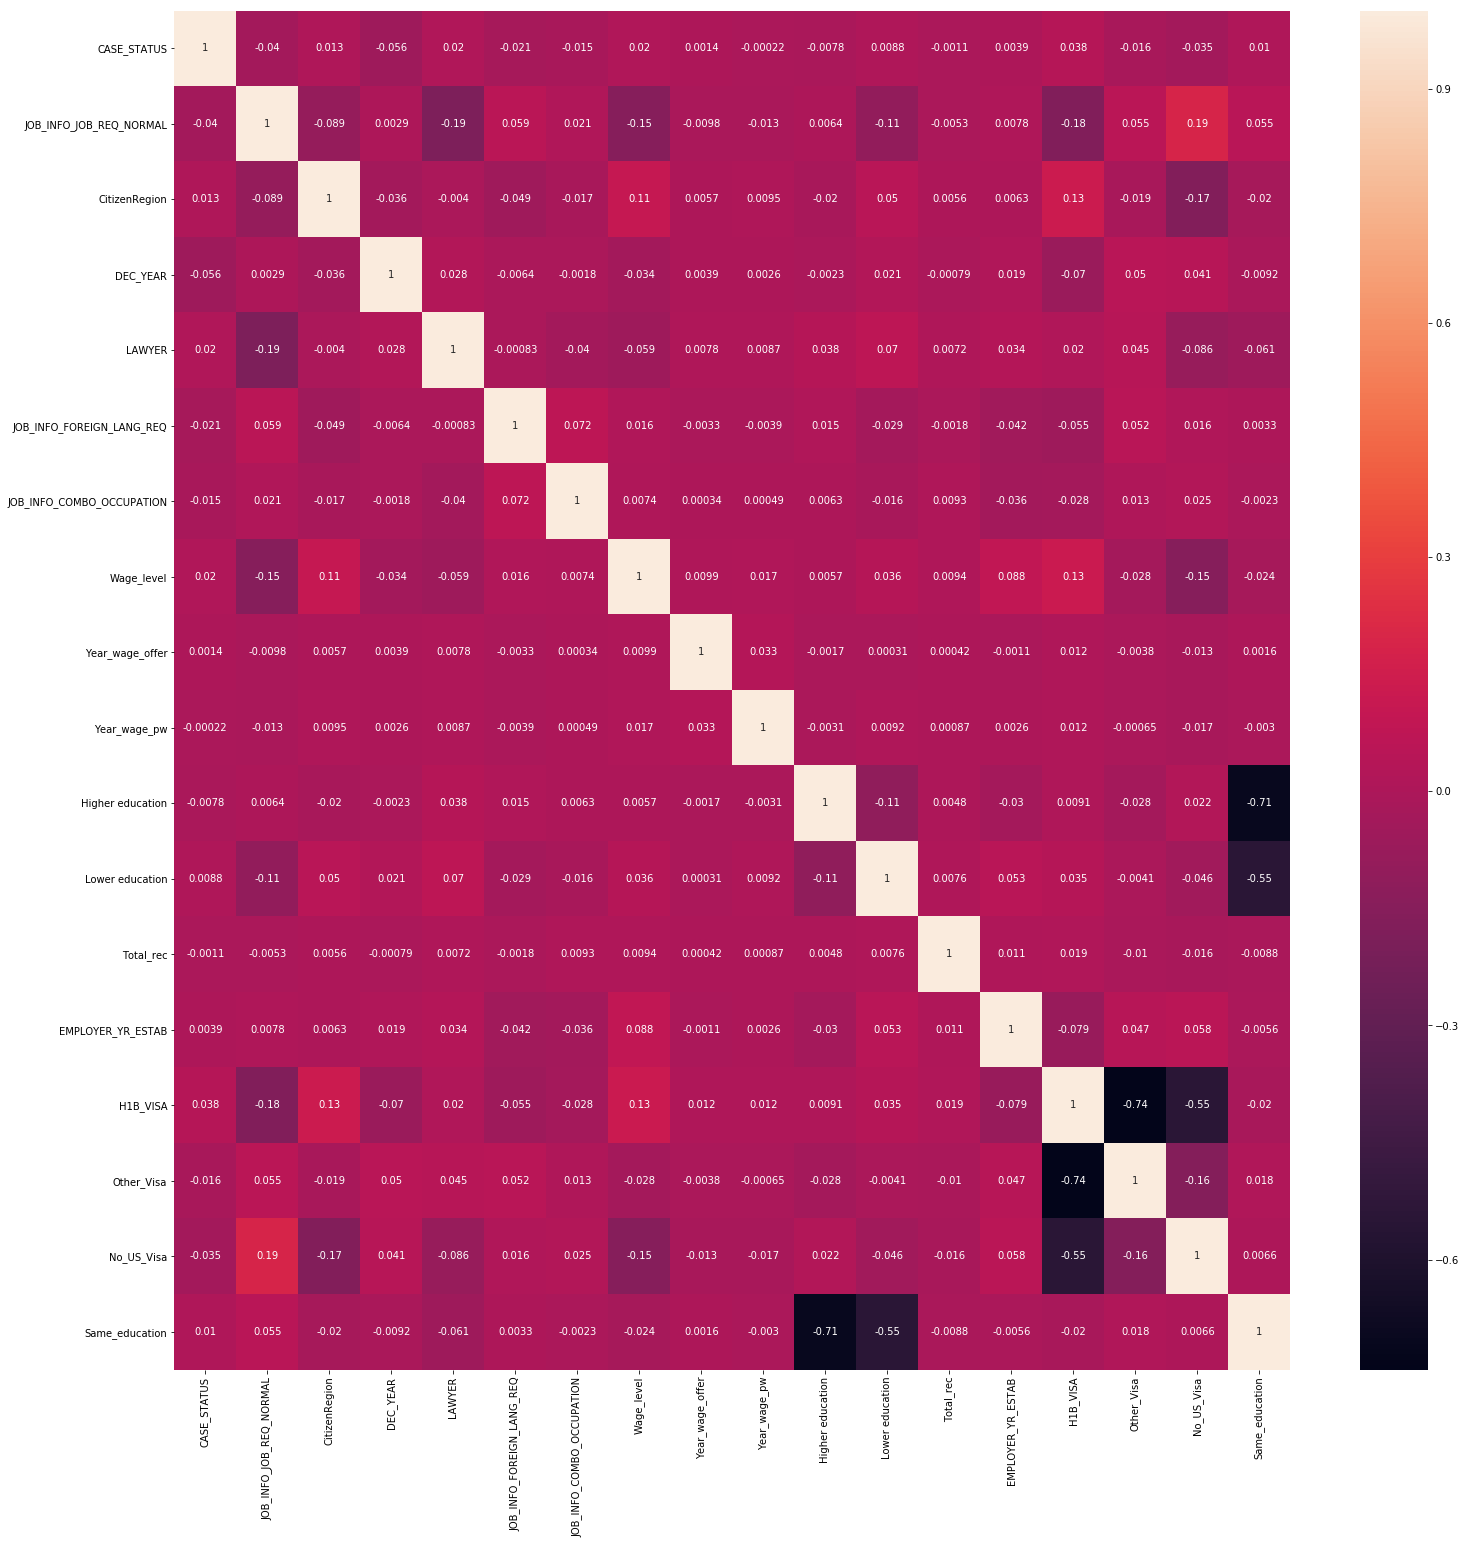

In [205]:
fig, ax = plt.subplots(figsize=(25,25)) 
sns.heatmap(data_fin.corr(), annot = data_fin.corr())
plt.savefig('corr.pdf')

In [206]:
data_fin.fillna(0,inplace = True)
data_fin.astype(int,inplace = True)
X = data_fin.iloc[:,1:]
Y = data_fin.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)



#data_fin.to_excel('/Users/joshuaschuett/Desktop/Analytics/datafin.xlsx')

In [207]:
data_ftr

,JOB_INFO_JOB_REQ_NORMAL,CitizenRegion,postalValue,DEC_YEAR,LAWYER,JOB_INFO_FOREIGN_LANG_REQ,JOB_INFO_COMBO_OCCUPATION,Wage_level,Year_wage_offer,Year_wage_pw,Ind_code,Higher education,Lower education,Total_rec,EMPLOYER_YR_ESTAB,H1B_VISA,Other_Visa,No_US_Visa,Same_education
0,1,13,6.0,2015,1,0,0,3.0,93000.0,76482.0,15.0,0,1,165.0,1862.0,1,0,0,0
1,1,13,0.0,2015,1,0,0,3.0,90459.0,90459.0,15.0,0,0,95.0,2002.0,1,0,0,1
2,0,12,9.0,2014,1,0,0,2.0,175000.0,98675.0,15.0,0,0,57.0,1998.0,0,1,0,1
3,1,13,9.0,2015,1,0,0,0.0,112958.5,80617.0,17.0,0,0,43.0,1968.0,1,0,0,1
4,1,13,2.0,2015,1,0,0,2.0,94016.0,87422.0,15.0,1,0,133.0,1999.0,1,0,0,0
5,0,13,9.0,2014,1,0,0,3.0,148540.0,112674.0,15.0,0,0,51.0,1982.0,1,0,0,1
6,1,14,9.0,2015,1,0,0,2.0,104000.0,83803.0,29.0,0,0,144.0,1978.0,1,0,0,1
7,1,13,9.0,2015,1,0,0,4.0,111717.0,111717.0,15.0,0,0,96.0,2004.0,1,0,0,1
8,1,13,2.0,2015,1,0,0,3.0,105144.0,105144.0,15.0,0,0,66.0,2007.0,1,0,0,1
9,0,13,0.0,2015,1,0,0,4.0,122179.0,122179.0,15.0,0,0,63.0,1989.0,0,0,1,1


In [208]:
#running logistic model with sklearn
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
coef = classifier.coef_[0]
print (coef)
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print('Accuracy of logistic regression classifier on test set: {:.9f}'.format(classifier.score(X_test, y_test)))

[-1.19681852e-05  2.21040210e-05 -1.44229869e-05  2.12343588e-04
  5.13888563e-06 -1.93354018e-06 -9.63687920e-07  1.58049316e-05
  2.28743487e-06 -1.09831661e-08 -2.62692785e-04 -1.78568287e-06
  1.27610391e-06 -1.80770532e-05  1.01962156e-03  1.19960742e-05
 -4.89396745e-06 -6.97319391e-06  4.09694229e-06]
[[    0  4885]
 [    0 69597]]
Accuracy of logistic regression classifier on test set: 0.934413684


In [209]:
#running logistic model with statsmodels
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
result = logit.fit()
result.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).